In [1]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'hockey_players.csv', encoding='cp1251',parse_dates=['birth'])
df = df.drop_duplicates(['name', 'birth'])
df

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6286,2016,USA,7,compher j.t.,F,R,180,87.0,1995-04-08,university of michigan,21.065024,1995,26.851852
6288,2016,USA,72,vatrano frank,F,L,178,98.0,1994-03-14,boston bruins,22.132786,1994,30.930438
6289,2016,USA,1,kinkaid keith,G,L,191,88.0,1989-07-04,new jersey devils,26.825462,1989,24.122146
6290,2016,USA,30,condon mike,G,L,188,89.0,1990-04-27,montreal canadiens,26.012320,1990,25.181077


In [5]:
df['height'].mean() # взяли столбец 'height' - рост и нашли по нему среднее значение (математическое ожидание)

183.829386763813

In [6]:
df['height'].var() # взяли столбец 'height' - рост и нашли по нему дисперсию по умолчанию несмещённая

29.894963668771

In [7]:
np.var(df['height']) # дисперсия из numpy - по умолчанию смещённая

29.885888087815086

In [8]:
print('несмещённая: ', df['height'].var(ddof=1)) # ddof - дельта степеней свободы
print('смещённая: ', df['height'].var(ddof=0))

несмещённая:  29.894963668771
смещённая:  29.885888087815086


In [9]:
df['height'].std() # СКО - среднее квадратическое отклонение

5.467628706191652

In [10]:
df['height'].mode() # мода

0    180
Name: height, dtype: int64

In [11]:
df['height'].median() # медиана

184.0

In [12]:
df['height'].quantile([0.25])

0.25    180.0
Name: height, dtype: float64

In [13]:
df['height'].quantile([0.25, 0.5, 0.75])

0.25    180.0
0.50    184.0
0.75    188.0
Name: height, dtype: float64

In [14]:
df['height'].describe()

count    3294.000000
mean      183.829387
std         5.467629
min       165.000000
25%       180.000000
50%       184.000000
75%       188.000000
max       205.000000
Name: height, dtype: float64

<AxesSubplot: >

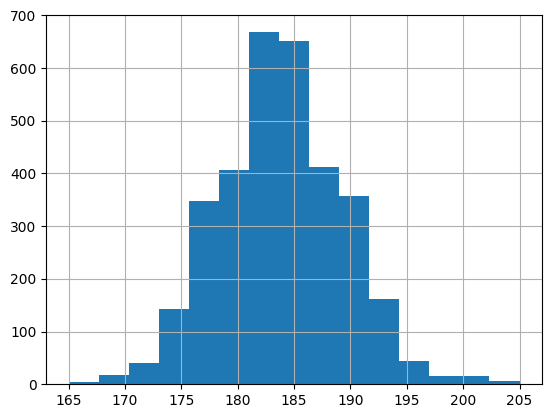

In [15]:
df['height'].hist(bins=15)

<AxesSubplot: >

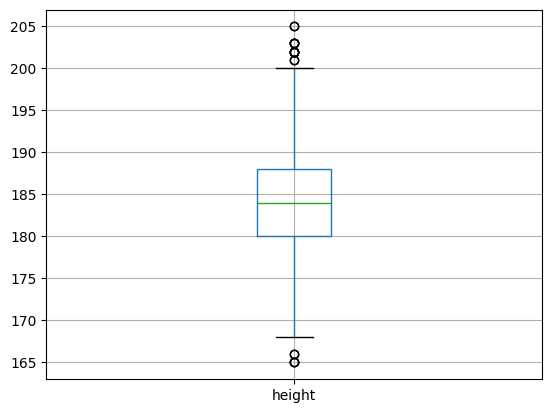

In [16]:
df[['height']].boxplot()

# Задачи на повторение

## Задача 1
Являются ли несовместными следующие события: <br>
опыт – подбрасывание симметричной монеты.

+ событие А – появление герба, <br>
+ событие В – появление решки. 

Обоснуйте ответ.

## Ответ

События несовместные, так как одновременно монета не может упасть на орел или решку

## Задача 2

Являются ли равновозможными следующие события: 
+ опыт – подбрасывание симметричной монеты; 
    + событие А – появление герба, 
    + событие В – появление решки
+ опыт – выстрел по мишени; 
    + событие А – попадание,
    + событие В - промах

## Ответ

Подбрасывание симметричной монеты - равновозможное событие, а выстрел по мишени зависит от многих факторов и вероятность попасть или промахнуться не равны поэтому события не равновозможные.

## Задача 3

Партия электрических лампочек на $25\%$ изготовлена $1-м$ заводом, на $35\%$ - $2-м$ заводом, на $40\%$ - третьим. 

Вероятность выпуска бракованных лампочек соответственно равны: $q_1 = 0.03, q_2 = 0.02, q_3 = 0.01.$ 

Какова вероятность того, что наудачу взятая лампочка окажется бракованной?

## Решение

Применим формулу __полной вероятности__

$P(A) = P(B_1) \cdot P(A│B_1) + P(B_2) \cdot P(A│B_2) + P(B_3) \cdot P(A│B_3)$

$P(A) = 0.25 \cdot 0.03 + 0.35 \cdot 0.02 + 0.4 \cdot 0.01 = 0.0075 + 0.007 + 0.004 = 0.0185$ 


In [20]:
print(round(0.25 * 0.03, 4))
print(round(0.35 * 0.02, 4))
print(round(0.4 * 0.01, 4))
print(round(0.25 * 0.03 + 0.35 * 0.02 + 0.4 * 0.01, 4))

0.0075
0.007
0.004
0.0185


## Задача 4 
В урне $a$ красных и $b$ голубых шаров, одинаковых по размеру и весу. 

Чему равна вероятность того, что наудачу извлеченный шар из этой урны окажется голубым? 

Записать ответ в виде буквенного выражения.

## Решение

Применим формулу вероятности:

$P(A)=\dfrac{m}{n}$<br>

где $m$ - число благоприятных исходов, а <br>
$n$ - всего исходов

$P(A)=\dfrac{m}{n}=\dfrac{b}{a+b}$<br>

## Задача 5
Когда используется формула Пуассона, а когда формула Бернулли?

## Ответ

Формула Пуассона используется в частных случаях, когда вероятность наступления события очень маленькая $(< 0.1)$, а число испытаний очень большое.
1. ДСВ - дискретные случайные величины
2. Испытания независимые с одинаковой вероятностью


## Самостоятельная работа

## Задача 1. 
Являются ли равновозможными следующие события: <br>
опыт – подбрасывание погнутой монеты. 
+ Событие А –появление герба, 
+ событие В – появление цифры. 

## Ответ

Так как монета не симметричная и одно из событий будет наступать чаще, то события не равновозможные.

## Задача2: 

Партия деталей изготовлена тремя рабочими, причем:
+ первый изготовил 35% всех деталей, 
+ второй – 40% всех деталей,
+ третий – всю остальную продукцию. 

Брак в их продукции составляет:
+ у первого -2%,
+ у второго - 3%,
+ у третьего – 4%. 

Случайно выбранная для контроля деталь оказалась бракованной. 

Найти вероятность того, что она изготовлена третьим рабочим. 

## Решение

Здесь надо применить формулу Байеса:

$P(B│A)=\dfrac{P(A│B)*P(B)}{P(A)}$

Здесь $P(B)$ – априорная вероятность (определяется до испытания)<br>
$P(B|A)$ -  апостериорная вероятность

$P(B_3│A)=\dfrac{P(A│B_3)*P(B_3)}{P(A)}$<br>

Помним, что $А$ – достать бракованную деталь, $В$ - то, что деталь изготовлена третьим рабочим. <br>
+ Вероятность изготовления брака у третьего рабочего $0.04$,
+ вероятность, что эту деталь изготовил третий рабочий $(1 - 0.35 - 0.4 = 0.25)$,
+ ну и полную вероятность события посчитаем по формуле полной вероятности:<br>

$P(A) = P(B_1) \cdot P(A│B_1) + P(B_2) \cdot P(A│B_2) + P(B_3) \cdot P(A│B_3)$

$P(A) = 0.35 \cdot 0.02 + 0.4 \cdot 0.03 + 0.25 \cdot 0.04 = 
0.007 + 0.012 + 0.01 = 0.029$

$P (B_3│A)=\dfrac{P(A│B_3)*P(B_3)}{P(A)}=\dfrac{0.04 * 0.25}{0.029} \approx 0.3448$


In [27]:
print(round(0.35 * 0.02, 4))
print(round(0.4 * 0.03, 4))
print(round(0.25 * 0.04, 4))
print(round(0.35 * 0.02 + 0.4 * 0.03 + 0.25 * 0.04, 4))

print(f"{round(0.35 * 0.02, 4)} + \
{round(0.4 * 0.03, 4)} + \
{round(0.25 * 0.04, 4)} = \
{round(0.35 * 0.02 + 0.4 * 0.03 + 0.25 * 0.04, 4)}")

print(round(0.04 * 0.25/(0.35 * 0.02 + 0.4 * 0.03 + 0.25 * 0.04), 4))

0.007
0.012
0.01
0.029
0.007 + 0.012 + 0.01 = 0.029
0.3448


## Задача 4

В ящике $15$ шаров, из которых $5$ голубых и $10$ красных. 

Из ящика последовательно вынимают $2$ шара; <br>
первый шар в ящик не возвращают.

Найти вероятность, что
+ первый вытащенный шар - красный , а
+ второй – голубой. 

## Решение

Действия происходят последовательно, значит здесь будет умножение вероятностей:

$P = \dfrac{10}{15} \cdot \dfrac{5}{14} = \dfrac{10 * 5}{15 * 14} = \dfrac{5}{21} \approx 0.2381 $


In [32]:
round((10*5)/(15*14),4)

0.2381

In [33]:
5/21

0.23809523809523808

## Задача 4
Известно, что в принятой для сборки партии из $1000$ деталей имеются $4$ дефектных. 

Найдите вероятность, что среди $50$ случайно взятых деталей нет дефектных.

## Решение

Формула Пуассона

>$P_m ≈ \dfrac{λ^m}{m!}\cdot e^{-λ}$
>
>$λ = n \cdot p$<br>
>
>$λ-$ средняя интенсивность наступления события на некоторую единицу измерения<br>
>$n-$ число испытаний<br>
>$p-$ вероятность наступления события A в независимых испытаниях,<br>
>$m-$ число наступления события<br>

В данном случае 

$λ = n \cdot p = 50 \cdot 0.004 = 0.2$<br>

$P(X=o) ≈ \dfrac{λ^m}{m!}\cdot e^{-λ} ≈ \dfrac{0.2^{0}}{0!}\cdot e^{-0.2} \approx 0.8187$

Для вычисления ответа используем функцию

In [37]:
from math import factorial as fc
from fractions import Fraction

In [38]:
def c (k,n): # сочетание
    return (fc(n) // (fc(k)*fc(n-k)))

def cf (k,n): # сочетание с неправильной дробью
    return Fraction(fc(n) // (fc(k)*fc(n-k)))

def a (k,n): # размещение
    return (fc(n) // fc(n-k))

def af (k,n): # размещение с неправильной дробью
    return Fraction(fc(n) // fc(n-k))

def p (n): # перестановка
    return fc(n)

In [39]:
def bernoulli(n, k, p):  # формула Бернулли
    
    # k - число наступления события
    # n - число испытаний
    # p - вероятность наступления события A в независимых испытаниях,
    # q=1–p - Противоположная вероятность
    
    return cf(k,n)*p**k*(1-p)**(n-k)

In [40]:
import math
def poisson (n, m, p): # формула Пуассона
    λ = n*p
    # λ - средняя интенсивность наступления события на некоторую единицу измерения
    # λ = n*p
    # n - число испытаний
    # p - вероятность наступления события A в независимых испытаниях,
    # m - число наступления события
        
    return (λ**m/fc(m))*math.e**(-λ)

In [50]:
round(poisson(50, 0, 0.004), 4)

0.8187

: 